# Eco-diplomatie - Team FOWAC

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from IPython.display import display_html
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Import dataset & traitements valeurs manquantes

In [4]:
# Import dataset avec exclusion header & footer
df = pd.read_excel('DATABASE.xls', index_col=0, skiprows=[0,1,2], skipfooter=42) 

# Rename columns
df = df.rename(columns={'Sender c': 'Sender1', 
                        'Sender 2c': 'Sender2', 
                        'Sender 3c': 'Sender3', 
                        'Targetd': 'Target',
                        'US casee': 'US_case', 
                        'US unilateral casef': 'US_unilateral_case', 
                        'Foreign policy goal categoryg': 'Goal_categ', 
                        'First yearh': 'First_year',
                        'Last yeari': 'Last_year', 
                        'Policy resultj': 'Policy_result', 
                        'Sanctions contributionk': 'Sanctions_contrib',
                        'Success \nscorel': 'Success_score', 
                        'Companion policiesm': 'Comp_policies', 
                        'International cooperationn':'Int_coop', 
                        'International assistanceo': 'Int_assistance', 
                        'Cooperating international organizationp': 'Coop_int_org',
                        'International organization senderq': 'Int_org_sender', 
                        'International organization sender & target membersr': 'Int_org_sender_&_target_members', 
                        'Length (years)s': 'Length_years',
                        'Prior relationst': 'Prior_relations', 
                        'Regime Type \n(DEMOC 1st year)u': 'Regime_type', 
                        'Regime Type2 (Polity2 1st year)v': 'Regime_type2', 
                        'Regime Type3 \n(Scale 1st year)w': 'Regime_type3',
                        'Political stability priorx': 'Political_stability_prior', 
                        'Political stability duringy': 'Political_stability_during',
                        'Cost to targetz': 'Cost_to_target', 
                        'Cost to target (percent of GNP)aa': 'Cost_to_target_%GNP',
                        'Cost to target per capitabb': 'Cost_to_target_per_capita', 
                        'Trade linkagecc': 'Trade_linkage', 
                        'GNP \nratiodd': 'GNP_ratio',
                        'Health and stabilityee': 'Health_&_stability', 
                        'Sanction typeff': 'Sanction_type', 
                        'Cost to sendergg': 'Cost_to_sender',
                        'GDP growth (percent, 5-year average)hh': 'GDP_growth%5years_average', 
                        'Inflation (percent,\n 3-year average)ii':'Inflation%3years_average', 
                        'Target International Monetary Fund codejj': 'Target_int_monetary_code', 
                        'Country groupkk': 'Country_group'
                       })
# rename index
df.index.names = ['id_case']

# Remplacement des '--' en 0 puis conversion en numérique
df['Cost_to_target_%GNP'] = df['Cost_to_target_%GNP'].astype('str')
df['Cost_to_target_%GNP'] = df['Cost_to_target_%GNP'].str.replace('--', '0')
df['Cost_to_target_%GNP'] = pd.to_numeric(df['Cost_to_target_%GNP'])

# # Remplacement des '--' en 0 puis conversion en numérique
df['Cost_to_target'] = df['Cost_to_target'].astype('str')
df['Cost_to_target'] = df['Cost_to_target'].str.replace('--', '0')
df['Cost_to_target'] = pd.to_numeric(df['Cost_to_target'])

# # Remplacement des '--' en 0 puis conversion en numérique
df['Cost_to_target_per_capita'] = df['Cost_to_target_per_capita'].astype('str')
df['Cost_to_target_per_capita'] = df['Cost_to_target_per_capita'].str.replace('--', '0')
df['Cost_to_target_per_capita'] = pd.to_numeric(df['Cost_to_target_per_capita'])

# df[['Cost_to_target_%GNP', 'Cost_to_target', 'Cost_to_target_per_capita']].dtypes

#  remplacement des n.a. par NaN
df['GDP_growth%5years_average'] = df['GDP_growth%5years_average'].astype('str')
df['GDP_growth%5years_average'] = df['GDP_growth%5years_average'].str.replace('n.a.', '')
df['GDP_growth%5years_average'] = pd.to_numeric(df['GDP_growth%5years_average'])

df['GDP_growth%5years_average'].head()
# df['GDP_growth%5years_average'].dtypes
# df['GDP_growth%5years_average'].isna().sum()

# Suppression de la virgule '--' restent tels quels
df['Comp_policies'] = df['Comp_policies'].str.replace(',', '')
# df['Comp_policies'].head()

In [321]:
df.head()


,Case no.b,Sender1,Sender2,Sender3,Target,Goal,US_case,US_unilateral_case,Goal_categ,First_year,Last_year,Policy_result,Sanctions_contrib,Success_score,Comp_policies,Int_coop,Int_assistance,Coop_int_org,Int_org_sender,Int_org_sender_&_target_members,Length_years,Prior_relations,Regime_type,Regime_type2,Regime_type3,Political_stability_prior,Political_stability_during,Cost_to_target,Cost_to_target_%GNP,Cost_to_target_per_capita,Trade_linkage,GNP_ratio,Health_&_stability,Sanction_type,Cost_to_sender,GDP_growth%5years_average,Inflation%3years_average,Target_int_monetary_code,Country_group
id_case,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,14-1,UNITED KINGDOM,NaN,NaN,GERMANY,Military victory,0,0,4,1914,1918,4,3,12,R,4,A,--,0,0,4,1,5,2,2,0,0,843.0,7.1,12.58,9,1.0,3,"F,X,M",4,3.58,2.86667,134,1
1,17-1,UNITED STATES,NaN,NaN,JAPAN,Shipping for Allies,1,1,5,1917,1918,2,2,4,--,1,--,--,0,0,1,2,5,1,2,0,0,23.0,0.8,0.44,20.5,13.0,3,X,2,5.40,25.6,158,1
2,18-1,UNITED KINGDOM,NaN,NaN,RUSSIA,Destabilize Bolsheviks,0,0,2,1918,1920,1,2,2,RQ,4,--,--,0,0,2,1,1,-1,2,0.1,0,446.0,4.1,2.49,18.5,1.0,1,"F,X,M",3,NaN,n.a.,922,2
3,21-1,LEAGUE OF NATIONS,NaN,NaN,YUGOSLAVIA,Military disruption vs. Albania,0,0,3,1921,1921,4,4,16,--,4,--,--,1,1,1,2,3,0,2,0.4,0,0.0,0.0,0.00,26.5,37.0,2,--,2,-1.50,n.a.,188,2
4,25-1,LEAGUE OF NATIONS,NaN,NaN,GREECE,Withdraw from Bulgaria,0,0,3,1925,1925,4,4,16,--,4,--,--,1,1,1,2,0,-6,1,0.9,0,0.0,0.0,0.00,36,56.0,2,--,2,3.30,48.8,174,1


### Variables Quantitatives et Qualitatives

In [322]:
# display side by side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# display categoric & quantiv vars
df_categ = df.select_dtypes(include=['object']).columns
df_quant = df.select_dtypes(include=['int','float64']).columns
quant = pd.DataFrame.from_dict({'Numeric_var': df_quant})
categ = pd.DataFrame.from_dict({'Categ_vars': df_categ})
display_side_by_side(quant,categ)

,Numeric_var
0,Cost_to_target
1,Cost_to_target_%GNP
2,Cost_to_target_per_capita
3,GNP_ratio
4,GDP_growth%5years_average
,Categ_vars
0,Case no.b
1,Sender1
2,Sender2
3,Sender3


### Describe Numeric Variables

In [323]:
# list quantiv variables
df_quant = df.select_dtypes(include=['int','float64'])
list(df.select_dtypes(include=['int','float64']).columns)
df_quant.describe()

,Cost_to_target,Cost_to_target_%GNP,Cost_to_target_per_capita,GNP_ratio,GDP_growth%5years_average
count,204.000000,204.000000,204.000000,204.000000,186.000000
mean,457.345015,2.671495,30.659529,1910.267549,3.184562
std,2045.643232,6.578428,118.860966,6811.603934,4.660725
min,-182.000000,-6.300000,-6.450000,0.040000,-18.980000
25%,9.937500,0.040000,0.400000,13.750000,1.420000
50%,54.500000,0.700000,2.435000,104.500000,3.282222
75%,213.250000,2.600000,11.417500,577.725000,5.310000
max,18800.000000,54.000000,1093.000000,50869.000000,33.340000


## 4. Visualisations

### Principaux auteurs de sanctions

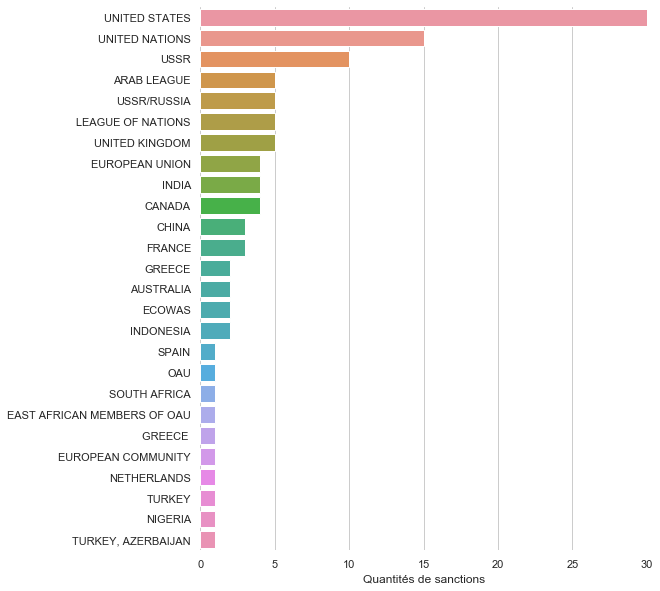

In [324]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df['Sender1'].value_counts(), y=df['Sender1'].value_counts().index)

# Add a legend and informative axis label
ax.set(xlim=(0, 30), ylabel="", xlabel="Quantités de sanctions")
sns.despine(left=True, bottom=True)

### Principaux motifs de sanctions

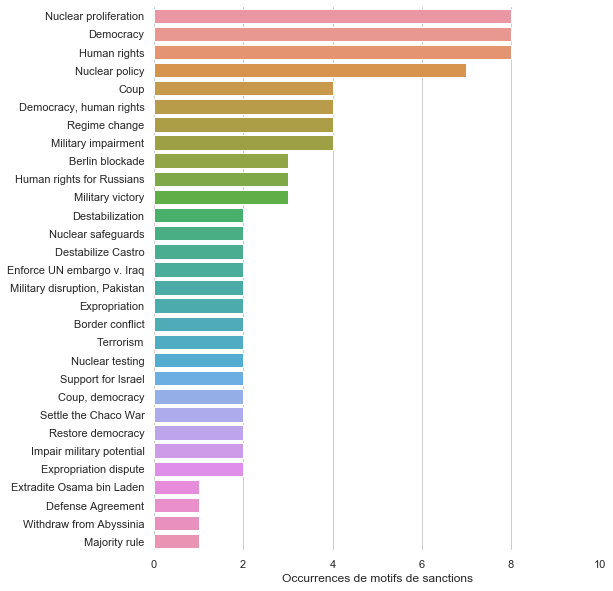

In [325]:
# Initialize matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df['Goal'].value_counts()[:30], y=df['Goal'].value_counts()[:30].index)

# Add a legend and informative axis label
ax.set(xlim=(0, 10), ylabel="", xlabel="Occurrences de motifs de sanctions")
sns.despine(left=True, bottom=True)

### Pays les plus impactés financièrement par les sanctions (Cost_to_target)

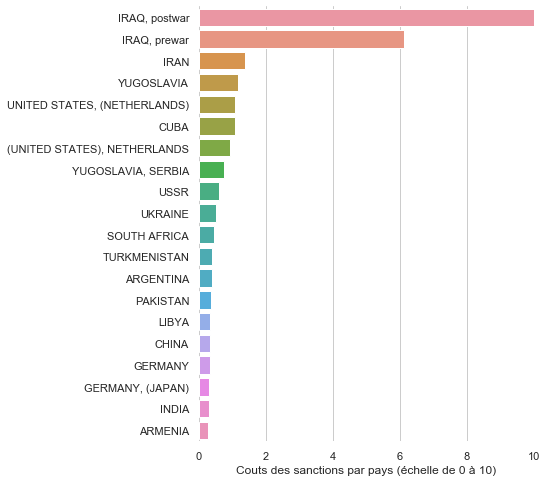

In [326]:
df_costs = df[['Target', 'Cost_to_target']].groupby(['Target']).sum().sort_values(by='Cost_to_target', ascending=False)
df_costs['Cost_to_target'].head()

X = df_costs['Cost_to_target'].values #returns a numpy array
scaler = preprocessing.MinMaxScaler(feature_range=(0, 10))
df_costs['costs'] = scaler.fit_transform(X.reshape(-1,1))
# df_costs[:5]  

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 8))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df_costs[:20].costs, y=df_costs[:20].index)

# Add a legend and informative axis label
ax.set(xlim=(0, 10), ylabel="", xlabel="Couts des sanctions par pays (échelle de 0 à 10)")
sns.despine(left=True, bottom=True)

### Pays les plus impactés financièrement par les sanctions (Cost_to_target_per_capita)

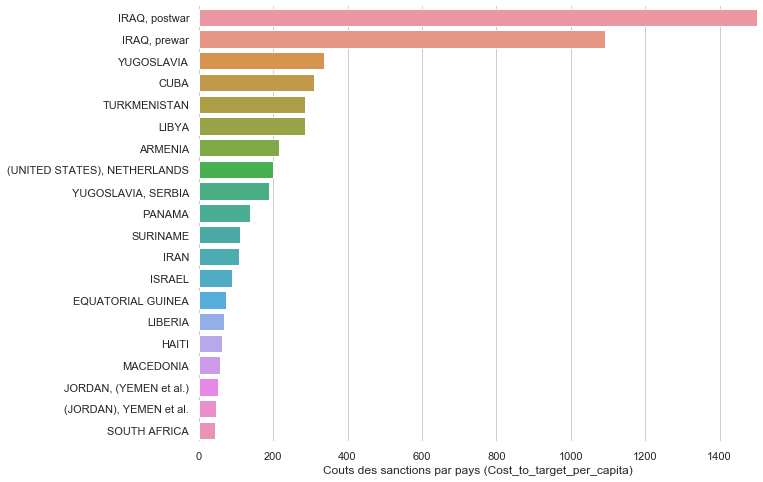

In [327]:
df_costs_capita = df[['Target', 'Cost_to_target_per_capita']].groupby(['Target']).sum().sort_values(by='Cost_to_target_per_capita', ascending=False)
# df_costs_capita[:20]  

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df_costs_capita[:20].Cost_to_target_per_capita, y=df_costs_capita[:20].index)

# Add a legend and informative axis label
ax.set(xlim=(0, 1500), ylabel="", xlabel="Couts des sanctions par pays (Cost_to_target_per_capita)")
sns.despine(left=True, bottom=True)

## Partie modélisation


In [328]:
# Defining X as all variables different from 'Success score', 'Policy result' and 'sanction contriution' and dropping 
# the last two as they are correlated with the first one.
data_table = df.drop(['Policy_result', 'Sanctions_contrib'], axis=1)

# Copying 'Success score' column then dropping the first (to have it as last column)
data_table['Success score'] = data_table['Success_score']
data_table = data_table.drop(['Success_score'], axis=1)

# Replacing remaining inconsistent values ('--' and 'n.a.') for MLP classifier
data_table = data_table.replace(to_replace='--', value= None)
data_table = data_table.replace(to_replace='n.a.', value= None)

# Dropping 'Sender 2/3' columns as they have lot of NaNs
data_table = data_table.drop(['Sender2','Sender3'], axis =1)

data_table.head()

,Case no.b,Sender1,Target,Goal,US_case,US_unilateral_case,Goal_categ,First_year,Last_year,Comp_policies,Int_coop,Int_assistance,Coop_int_org,Int_org_sender,Int_org_sender_&_target_members,Length_years,Prior_relations,Regime_type,Regime_type2,Regime_type3,Political_stability_prior,Political_stability_during,Cost_to_target,Cost_to_target_%GNP,Cost_to_target_per_capita,Trade_linkage,GNP_ratio,Health_&_stability,Sanction_type,Cost_to_sender,GDP_growth%5years_average,Inflation%3years_average,Target_int_monetary_code,Country_group,Success score
id_case,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,14-1,UNITED KINGDOM,GERMANY,Military victory,0,0,4,1914,1918,R,4,A,--,0,0,4,1,5,2,2,0,0,843.0,7.1,12.58,9,1.0,3,"F,X,M",4,3.58,2.86667,134,1,12
1,17-1,UNITED STATES,JAPAN,Shipping for Allies,1,1,5,1917,1918,R,1,A,--,0,0,1,2,5,1,2,0,0,23.0,0.8,0.44,20.5,13.0,3,X,2,5.40,25.6,158,1,4
2,18-1,UNITED KINGDOM,RUSSIA,Destabilize Bolsheviks,0,0,2,1918,1920,RQ,4,A,--,0,0,2,1,1,-1,2,0.1,0,446.0,4.1,2.49,18.5,1.0,1,"F,X,M",3,NaN,25.6,922,2,2
3,21-1,LEAGUE OF NATIONS,YUGOSLAVIA,Military disruption vs. Albania,0,0,3,1921,1921,RQ,4,A,--,1,1,1,2,3,0,2,0.4,0,0.0,0.0,0.00,26.5,37.0,2,--,2,-1.50,25.6,188,2,16
4,25-1,LEAGUE OF NATIONS,GREECE,Withdraw from Bulgaria,0,0,3,1925,1925,RQ,4,A,--,1,1,1,2,0,-6,1,0.9,0,0.0,0.0,0.00,36,56.0,2,--,2,3.30,48.8,174,1,16


#### Encodage de variables catégorielles en variables numériques

In [329]:
lb_make = LabelEncoder()

# Transforming categorical values to numeeric values
for c in data_table.columns:
    if(data_table[c].dtype == 'O'):
        data_table[c] = lb_make.fit_transform(data_table[c])
        #print(type(c))   

data_table.head()

,Case no.b,Sender1,Target,Goal,US_case,US_unilateral_case,Goal_categ,First_year,Last_year,Comp_policies,Int_coop,Int_assistance,Coop_int_org,Int_org_sender,Int_org_sender_&_target_members,Length_years,Prior_relations,Regime_type,Regime_type2,Regime_type3,Political_stability_prior,Political_stability_during,Cost_to_target,Cost_to_target_%GNP,Cost_to_target_per_capita,Trade_linkage,GNP_ratio,Health_&_stability,Sanction_type,Cost_to_sender,GDP_growth%5years_average,Inflation%3years_average,Target_int_monetary_code,Country_group,Success score
id_case,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,21,43,105,0,0,4,1914,0,4,4,0,0,0,0,4,1,7,13,1,0,0,843.0,7.1,12.58,27,1.0,3,4,4,3.58,27,3,1,12
1,2,23,60,130,1,1,5,1917,0,4,1,0,0,0,0,1,2,7,12,1,0,0,23.0,0.8,0.44,50,13.0,3,6,2,5.40,113,7,1,4
2,3,21,96,37,0,0,2,1918,1,5,4,0,0,0,0,2,1,3,10,1,1,0,446.0,4.1,2.49,45,1.0,1,4,3,NaN,113,87,2,2
3,4,13,122,98,0,0,3,1921,2,5,4,0,0,1,1,1,2,5,11,1,4,0,0.0,0.0,0.00,61,37.0,2,0,2,-1.50,113,13,2,16
4,5,13,45,139,0,0,3,1925,3,5,4,0,0,1,1,1,2,2,5,0,8,0,0.0,0.0,0.00,73,56.0,2,0,2,3.30,126,9,1,16


#### Partie entrainement  (supervisée):
##### Avec modèle NN


In [330]:
# Filling null values with 0
data_table = data_table.fillna(0)

# Splitting data for training and test set
X, y = data_table.iloc[:,:33], data_table['Success score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Choosing MLP classifier for NN
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Neural network model accuracy (discrete target variable) :")
print("Accuracy on training set : {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set : {:.2f}".format(mlp.score(X_test, y_test)))

Neural network model accuracy (discrete target variable) :
Accuracy on training set : 0.62
Accuracy on test set : 0.21


C:\Users\Formation\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##### Réentrainement du modèle NN avec un changement de la variable cible "Success score" en variable booléenne

In [331]:
# If 'Success score' >=9, y=1, y=0 otherwise. 
yb = [0 if(i<9) else 1 for i in y]

X_train, X_test, y_train, y_test = train_test_split(X, yb, test_size=0.33, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Neural network model accuracy (boolean target variable) :")
print("Accuracy on training set : {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set : {:.2f}".format(mlp.score(X_test, y_test)))

Neural network model accuracy (boolean target variable) :
Accuracy on training set : 0.65
Accuracy on test set : 0.66


On peut voir que les résultats sont meilleurs avec une variable boolénenne comme cible.

##### Avec modèle arbre de décision

In [332]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Decision tree model accuracy :")
print("Accuracy on training set : {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set : {:.3f}".format(tree.score(X_test, y_test)))

Decision tree model accuracy :
Accuracy on training set : 1.000
Accuracy on test set : 0.618


Meilleurs résultats qu'avec un modèle NN.

##### Avec modèle arbre de décision : Feature importance 

In [333]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.0275974  0.         0.02761844 0.20543951 0.         0.
 0.01609848 0.         0.08543771 0.         0.         0.
 0.         0.         0.         0.07214441 0.07317493 0.
 0.         0.         0.         0.         0.         0.08341785
 0.12965585 0.04513889 0.         0.         0.         0.03219697
 0.03577441 0.07991653 0.08638861]


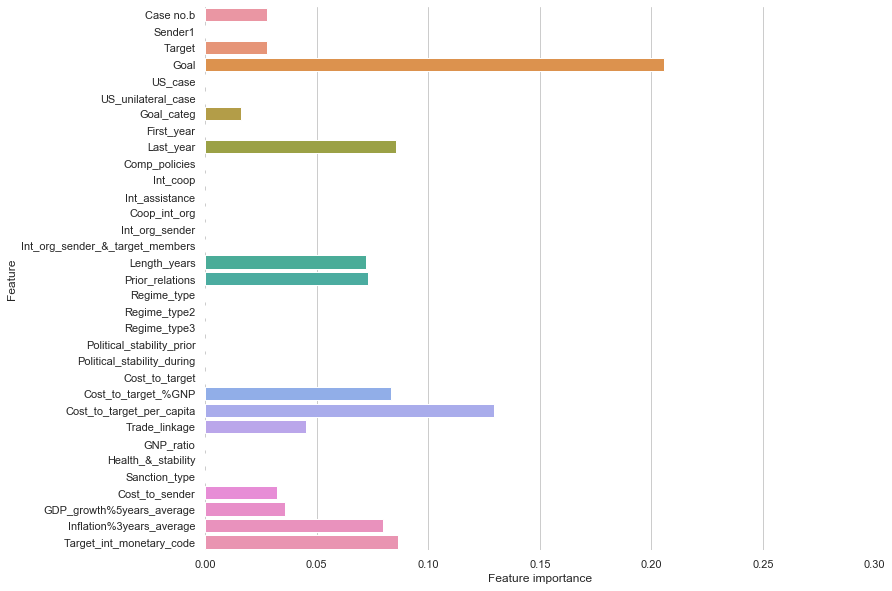

In [334]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x= tree.feature_importances_, y = data_table.columns[:33])

# Add a legend and informative axis label
ax.set(xlim=(0, 0.3), ylabel="Feature", xlabel="Feature importance")
sns.despine(left=True, bottom=True)

#### Avec modèle Random forest : 

In [288]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Random forest model accuracy :")
print("Accuracy on training set : {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set : {:.3f}".format(forest.score(X_test, y_test)))

Random forest model accuracy :
Accuracy on training set : 1.000
Accuracy on test set : 0.706


# SUITE

In [289]:
data_table.head(10)

,Case no.b,Sender1,Target,Goal,US_case,US_unilateral_case,Goal_categ,First_year,Last_year,Comp_policies,Int_coop,Int_assistance,Coop_int_org,Int_org_sender,Int_org_sender_&_target_members,Length_years,Prior_relations,Regime_type,Regime_type2,Regime_type3,Political_stability_prior,Political_stability_during,Cost_to_target,Cost_to_target_%GNP,Cost_to_target_per_capita,Trade_linkage,GNP_ratio,Health_&_stability,Sanction_type,Cost_to_sender,GDP_growth%5years_average,Inflation%3years_average,Target_int_monetary_code,Country_group,Success score
id_case,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,21,43,105,0,0,4,1914,0,4,4,0,0,0,0,4,1,7,13,1,0,0,843.000,7.100,12.580,27,1.0,3,4,4,3.58,27,3,1,12
1,2,23,60,130,1,1,5,1917,0,4,1,0,0,0,0,1,2,7,12,1,0,0,23.000,0.800,0.440,50,13.0,3,6,2,5.40,113,7,1,4
2,3,21,96,37,0,0,2,1918,1,5,4,0,0,0,0,2,1,3,10,1,1,0,446.000,4.100,2.490,45,1.0,1,4,3,0.00,113,87,2,2
3,4,13,122,98,0,0,3,1921,2,5,4,0,0,1,1,1,2,5,11,1,4,0,0.000,0.000,0.000,61,37.0,2,0,2,-1.50,113,13,2,16
4,5,13,45,139,0,0,3,1925,3,5,4,0,0,1,1,1,2,2,5,0,8,0,0.000,0.000,0.000,73,56.0,2,0,2,3.30,126,9,1,16
5,6,13,4,129,0,0,3,1932,5,5,3,0,0,1,1,3,2,6,13,1,0,0,2.500,2.600,0.800,103,322.0,2,6,2,0.00,126,18,3,6
6,6,13,89,129,0,0,3,1932,5,5,3,0,0,1,1,3,2,3,8,1,0,0,0.001,0.001,0.001,98,735.0,2,6,2,0.00,126,30,3,6
7,7,21,119,120,0,0,1,1933,4,5,1,0,0,0,0,1,1,2,1,0,0,0,4.000,0.020,0.020,35,1.0,2,5,2,2.35,126,100,2,12
8,8,13,58,138,0,0,3,1935,6,5,4,0,0,1,1,1,2,2,1,0,3,0,86.000,1.700,1.980,41,6.0,3,4,3,-0.52,0,4,1,2


In [290]:
data_table.columns

Index(['Case no.b', 'Sender1', 'Target', 'Goal', 'US_case', 'US_unilateral_case', 'Goal_categ', 'First_year', 'Last_year', 'Comp_policies', 'Int_coop', 'Int_assistance', 'Coop_int_org', 'Int_org_sender', 'Int_org_sender_&_target_members', 'Length_years', 'Prior_relations', 'Regime_type', 'Regime_type2', 'Regime_type3', 'Political_stability_prior', 'Political_stability_during', 'Cost_to_target', 'Cost_to_target_%GNP', 'Cost_to_target_per_capita', 'Trade_linkage', 'GNP_ratio', 'Health_&_stability', 'Sanction_type', 'Cost_to_sender', 'GDP_growth%5years_average', 'Inflation%3years_average', 'Target_int_monetary_code', 'Country_group', 'Success score'], dtype='object')

In [291]:
data_table = data_table.drop(['Case no.b', 'US_case','Sender1','Target','US_unilateral_case',
                              'Goal','First_year','Last_year','Int_org_sender'], axis=1)

In [292]:
nbre_col = data_table.shape[1] - 1
nbre_col

25

In [293]:
# Splitting data for training and test set
X, y = data_table.iloc[:,:nbre_col], data_table['Success score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Histogramme

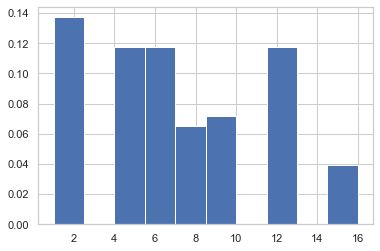

In [339]:
# Histogramme
data_table['Success score'].hist(density=True)
#df.std_wtd.plot.hist(bins=12, alpha=0.5)
# Histogramme plus beau
#df[df.std_wtd.abs() < 100]["std_wtd"].hist(density=True,bins=20)
plt.show()

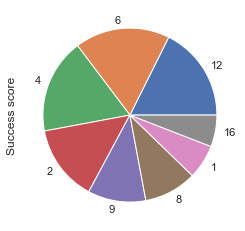

In [340]:
data_table['Success score'].value_counts(normalize=True).plot(kind='pie')

In [341]:
df_correlation = data_table[["Success score", "Inflation%3years_average", "Target_int_monetary_code",
                            "GDP_growth%5years_average","Cost_to_sender","Sanction_type"]]
corr = df_correlation.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Success score,Inflation%3years_average,Target_int_monetary_code,GDP_growth%5years_average,Cost_to_sender,Sanction_type
Success score,1.00,0.09,-0.22,-0.02,-0.12,-0.21
Inflation%3years_average,0.09,1.00,0.04,-0.10,-0.13,-0.02
Target_int_monetary_code,-0.22,0.04,1.00,-0.16,0.03,0.01
GDP_growth%5years_average,-0.02,-0.10,-0.16,1.00,-0.07,-0.05
Cost_to_sender,-0.12,-0.13,0.03,-0.07,1.00,0.51
Sanction_type,-0.21,-0.02,0.01,-0.05,0.51,1.00


In [342]:
df_correlation = data_table[["Success score","Cost_to_target","Cost_to_target_%GNP","Cost_to_target_per_capita",
                             "Trade_linkage","GNP_ratio","Regime_type2"]]
corr = df_correlation.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Success score,Cost_to_target,Cost_to_target_%GNP,Cost_to_target_per_capita,Trade_linkage,GNP_ratio,Regime_type2
Success score,1.00,-0.07,0.03,-0.04,0.16,-0.01,0.14
Cost_to_target,-0.07,1.00,0.81,0.96,0.19,-0.05,-0.13
Cost_to_target_%GNP,0.03,0.81,1.00,0.83,0.33,0.14,-0.17
Cost_to_target_per_capita,-0.04,0.96,0.83,1.00,0.21,-0.02,-0.15
Trade_linkage,0.16,0.19,0.33,0.21,1.00,0.27,-0.24
GNP_ratio,-0.01,-0.05,0.14,-0.02,0.27,1.00,-0.08
Regime_type2,0.14,-0.13,-0.17,-0.15,-0.24,-0.08,1.00


In [343]:
print(data_table.shape)
data_table.head()

(204, 35)


,Case no.b,Sender1,Target,Goal,US_case,US_unilateral_case,Goal_categ,First_year,Last_year,Comp_policies,Int_coop,Int_assistance,Coop_int_org,Int_org_sender,Int_org_sender_&_target_members,Length_years,Prior_relations,Regime_type,Regime_type2,Regime_type3,Political_stability_prior,Political_stability_during,Cost_to_target,Cost_to_target_%GNP,Cost_to_target_per_capita,Trade_linkage,GNP_ratio,Health_&_stability,Sanction_type,Cost_to_sender,GDP_growth%5years_average,Inflation%3years_average,Target_int_monetary_code,Country_group,Success score
id_case,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,21,43,105,0,0,4,1914,0,4,4,0,0,0,0,4,1,7,13,1,0,0,843.0,7.1,12.58,27,1.0,3,4,4,3.58,27,3,1,12
1,2,23,60,130,1,1,5,1917,0,4,1,0,0,0,0,1,2,7,12,1,0,0,23.0,0.8,0.44,50,13.0,3,6,2,5.40,113,7,1,4
2,3,21,96,37,0,0,2,1918,1,5,4,0,0,0,0,2,1,3,10,1,1,0,446.0,4.1,2.49,45,1.0,1,4,3,0.00,113,87,2,2
3,4,13,122,98,0,0,3,1921,2,5,4,0,0,1,1,1,2,5,11,1,4,0,0.0,0.0,0.00,61,37.0,2,0,2,-1.50,113,13,2,16
4,5,13,45,139,0,0,3,1925,3,5,4,0,0,1,1,1,2,2,5,0,8,0,0.0,0.0,0.00,73,56.0,2,0,2,3.30,126,9,1,16


### LASSO

In [344]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

#### Alpha (ou lambda qui est ici le coefficient de pénalité)

In [345]:
#generer un alpha quelconque pour test 
alphas = 10**np.linspace(10,-2,100)*0.5
#alphas

#### Coefficients

In [346]:
#générer une boucle pour récupérer les coeffs
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

#### représentation graphique du modèle

Text(0, 0.5, 'weights')

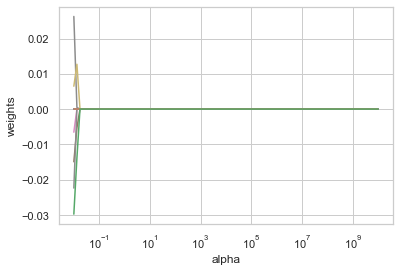

In [347]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')


#### fit et prediction

In [348]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

print("---------------------------")
pred = lasso.predict(X_test)
print(pred)
print("---------------------------")
print("MSE est : ", mean_squared_error(y_test, pred))
# mean_squared_error(y_test, lasso.predict(X_test))

---------------------------
[0.35294118 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118
 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118
 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118
 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118
 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118
 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118
 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118
 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118
 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118
 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118
 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118 0.35294118
 0.35294118 0.35294118]
---------------------------
MSE est :  0.21972318339100344


In [349]:
#print("LASSO :")
#print("Accuracy on training set : {:.3f}".format(lassocv.score(X_train, y_train)))
#print("Accuracy on test set : {:.3f}".format(lassocv.score(X_test, y_test)))

In [350]:
# on récupère les coefficients obtenus avec le modèle
# certains coefficcients sont maintenant réduit à 0
pd.Series(lasso.coef_, index=X.columns)

Case no.b                          0.000000e+00
Sender1                           -0.000000e+00
Target                            -0.000000e+00
Goal                               0.000000e+00
US_case                           -0.000000e+00
US_unilateral_case                -0.000000e+00
Goal_categ                        -0.000000e+00
First_year                        -0.000000e+00
Last_year                         -0.000000e+00
Comp_policies                     -0.000000e+00
Int_coop                          -0.000000e+00
Int_assistance                     0.000000e+00
Coop_int_org                      -0.000000e+00
Int_org_sender                     0.000000e+00
Int_org_sender_&_target_members    0.000000e+00
Length_years                      -0.000000e+00
Prior_relations                    0.000000e+00
Regime_type                        0.000000e+00
Regime_type2                       8.081980e-18
Regime_type3                       0.000000e+00
Political_stability_prior         -0.000

### RIDGE

In [351]:
#methode de Ridge
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)   #reduction
    coefs.append(ridge.coef_)    
np.shape(coefs)

(100, 33)

#### représentation graphique du modèle

Text(0, 0.5, 'weights')

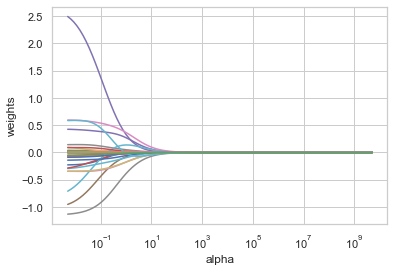

In [352]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

#### réduction du modèle et MSE

In [353]:
## alpha = 4 par défaut
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # donnees d'apprentissage

pred2 = ridge2.predict(X_test)           # prediction sur l'échantillon test 
print(" Les coeffients ")
print(pd.Series(ridge2.coef_, index = X.columns)) # les coefficients obtenus avec la méthode de Ridge
print("----------------------")
print("MSE est :", mean_squared_error(y_test, pred2))          # MSE

 Les coeffients 
Case no.b                          0.000041
Sender1                           -0.000891
Target                            -0.000250
Goal                               0.000243
US_case                            0.007208
US_unilateral_case                -0.014906
Goal_categ                        -0.008545
First_year                        -0.000109
Last_year                         -0.000301
Comp_policies                     -0.007056
Int_coop                           0.000154
Int_assistance                     0.000000
Coop_int_org                      -0.000282
Int_org_sender                    -0.001326
Int_org_sender_&_target_members    0.013696
Length_years                      -0.001580
Prior_relations                    0.015651
Regime_type                        0.003617
Regime_type2                       0.001971
Regime_type3                       0.015672
Political_stability_prior         -0.004719
Political_stability_during        -0.000991
Cost_to_target 

In [354]:
## pour un alpha grand alpha = 10**10
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # donnees d'apprentissage
pred3 = ridge3.predict(X_test)           # prediction sur l'échantillon test
print(" Les coeffients ")
print(pd.Series(ridge3.coef_, index = X.columns)) # les coefficients obtenus avec la méthode de Ridge
print("----------------------")
print("MSE est :",mean_squared_error(y_test, pred3))          # l'erreur MSE est plus grand quand alpha augmente

 Les coeffients 
Case no.b                          3.263278e-14
Sender1                           -6.104681e-13
Target                            -1.411159e-13
Goal                               1.259005e-13
US_case                           -6.079027e-13
US_unilateral_case                -8.415013e-12
Goal_categ                        -4.482041e-12
First_year                        -2.001493e-14
Last_year                         -1.405368e-13
Comp_policies                     -3.804646e-12
Int_coop                          -4.876448e-13
Int_assistance                     0.000000e+00
Coop_int_org                      -1.780335e-13
Int_org_sender                    -4.110021e-22
Int_org_sender_&_target_members    8.671329e-12
Length_years                      -1.038274e-12
Prior_relations                    9.605489e-12
Regime_type                        2.419435e-12
Regime_type2                       1.366377e-12
Regime_type3                       1.170101e-11
Political_stability_pri

In [355]:
## alpha = 0 : ça revient à faire la régression linéaire
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             # donnees d'apprentissage
pred = ridge2.predict(X_test)            # prediction sur l'échantillon test
print(" Les coeffients ")
print(pd.Series(ridge2.coef_, index = X.columns)) # coefficients
print("----------------------")
print(mean_squared_error(y_test, pred))           # l'erreur est petite et équivaut à celle de la régression linéaire plus haut

 Les coeffients 
Case no.b                          3.464475e-03
Sender1                           -1.717328e-02
Target                            -9.023822e-04
Goal                               1.282569e-03
US_case                            4.232833e-01
US_unilateral_case                -2.607728e-01
Goal_categ                        -2.954456e-02
First_year                        -1.119929e-02
Last_year                         -2.798021e-03
Comp_policies                     -5.376126e-02
Int_coop                          -2.219841e-02
Int_assistance                    -2.900110e-15
Coop_int_org                       1.536379e-03
Int_org_sender                    -8.346846e-02
Int_org_sender_&_target_members   -1.178568e-02
Length_years                      -3.479087e-03
Prior_relations                    8.383769e-02
Regime_type                        1.290037e-02
Regime_type2                       3.093391e-02
Regime_type3                      -1.922607e-01
Political_stability_pri

#### Validation croisée

In [312]:
# on fait la validation croisée pour récupérer notre vrai valeur alpha ici égal à 0.005
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_
# le meilleur alpha à conserver est 3.0679536367065814

2.320794416806386

In [313]:
### Maintenant ridge avecc alphacv = 3.0679536367065814
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
print("---------------------------")
pred = ridge4.predict(X_test)
#print(pred)
print(" Les coeffients ")
print(pd.Series(ridge4.coef_, index = X.columns))
print("---------------------------")
print("MSE est : ", mean_squared_error(y_test, pred))  # Comme notre valeur alpha est bonne l'erreur est petite et équivaut de 0.0005
# c le modèle final de Ridge qui est retenu 

---------------------------
 Les coeffients 
Goal_categ                        -0.154634
Comp_policies                     -0.081189
Int_coop                           0.024318
Int_assistance                     0.000000
Coop_int_org                       0.002699
Int_org_sender_&_target_members    0.288347
Length_years                      -0.003189
Prior_relations                    0.168054
Regime_type                        0.038209
Regime_type2                       0.020249
Regime_type3                       0.155474
Political_stability_prior         -0.019111
Political_stability_during        -0.003563
Cost_to_target                    -0.000029
Cost_to_target_%GNP                0.006317
Cost_to_target_per_capita          0.000198
Trade_linkage                      0.003975
GNP_ratio                         -0.000011
Health_&_stability                -0.225041
Sanction_type                     -0.103864
Cost_to_sender                    -0.059801
GDP_growth%5years_average      

In [314]:
#print("RIDGE :")
#print("Accuracy on training set : {:.3f}".format(ridge4.score(X_train, y_train)))
#print("Accuracy on test set : {:.3f}".format(ridge4.score(X_test, y_test)))

## Régression linéaire

In [315]:
# régression linéaire mutiple sur l'échantillon d'apprentissage puis prédiction sur l'échantillon test
#modeleReg=LinearRegression()
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)           # réduction 
pred2 = model.predict(X_test)           # modele pour predire l'echantillon test 

#les coeffictients B0, B1, B2 du modèle linéaire
print(" Les coeffients ")
print("----------------------")
print(pd.Series(model.coef_, index = X.columns)) # Print coefficients
print("----------------------")
# la méthode des moindres carrés estime l'écart entre la valeur prédite et la valeur observée
print("MSE est :", mean_squared_error(y_test, pred2)) 

 Les coeffients 
----------------------
Goal_categ                        -4.925262e-01
Comp_policies                     -2.238736e-01
Int_coop                           1.967345e-01
Int_assistance                    -3.847617e-15
Coop_int_org                       2.207414e-03
Int_org_sender_&_target_members    7.925535e-01
Length_years                       3.774056e-02
Prior_relations                    2.249246e-01
Regime_type                        1.503595e-01
Regime_type2                       1.839729e-01
Regime_type3                      -1.167287e+00
Political_stability_prior         -1.613708e-01
Political_stability_during        -3.742586e-02
Cost_to_target                    -1.178665e-03
Cost_to_target_%GNP                9.387780e-02
Cost_to_target_per_capita          1.167188e-02
Trade_linkage                      9.585962e-03
GNP_ratio                         -5.320525e-05
Health_&_stability                -1.256938e+00
Sanction_type                     -3.618002e-01


In [316]:
## régression linéaire avec statsmodels

In [317]:
%matplotlib inline

from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

In [318]:
model = sm.OLS(y, X)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:          Success score   R-squared (uncentered):                   0.778
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              26.36
Date:                Thu, 30 Apr 2020   Prob (F-statistic):                    1.28e-46
Time:                        03:36:22   Log-Likelihood:                         -561.97
No. Observations:                 204   AIC:                                      1172.
Df Residuals:                     180   BIC:                                      1252.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

## Conclusion

#### - le meileur modèle pour prédire le succès d'une santion est ridge
#### - les caractèristiques qui influents sur succès ou échèce d'une santion sont : Prior_relations, Cost_to_target, Sanction_type, Inflation%3years_average